In [1]:
!pip install ucimlrepo

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

In [3]:
# Fetch German Credit dataset by its ID on UCI ML Repo
# ID 144 corresponds to the German Credit Data
german_credit = fetch_ucirepo(id=144)

In [4]:
# Separate features (X) and target (y)
X = german_credit.data.features  # DataFrame of input features
y = german_credit.data.targets   # Series of labels (good/bad credit risk)

In [5]:
# Display the first 5 rows to inspect the data structure
print(X.head())
print(y.head())

  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A1

In [6]:
# Renaming columns for clarity and ease of understanding
# Original names like 'Attribute1' are replaced with descriptive names
new_column_names = {
    'Attribute1': 'checking_account_status',
    'Attribute2': 'duration_months',
    'Attribute3': 'credit_history',
    'Attribute4': 'credit_purpose',
    'Attribute5': 'credit_amount',
    'Attribute6': 'savings_account_bonds',
    'Attribute7': 'employment_since',
    'Attribute8': 'installment_rate_percent',
    'Attribute9': 'personal_status_sex',
    'Attribute10': 'other_debtors_guarantors',
    'Attribute11': 'residence_duration_years',
    'Attribute12': 'property_type',
    'Attribute13': 'age_years',
    'Attribute14': 'other_installment_plans',
    'Attribute15': 'housing_type',
    'Attribute16': 'existing_credits',
    'Attribute17': 'job_type',
    'Attribute18': 'dependents_count',
    'Attribute19': 'has_telephone',
    'Attribute20': 'is_foreign_worker',
    'class': 'credit_risk'
}

In [7]:
X = X.rename(columns=new_column_names)

In [8]:
y = y.rename(columns=new_column_names)

In [9]:
# Display the first 5 rows to inspect the data structure
print(X.head())
print(y.head())

  checking_account_status  duration_months credit_history credit_purpose  \
0                     A11                6            A34            A43   
1                     A12               48            A32            A43   
2                     A14               12            A34            A46   
3                     A11               42            A32            A42   
4                     A11               24            A33            A40   

   credit_amount savings_account_bonds employment_since  \
0           1169                   A65              A75   
1           5951                   A61              A73   
2           2096                   A61              A74   
3           7882                   A61              A74   
4           4870                   A61              A73   

   installment_rate_percent personal_status_sex other_debtors_guarantors  \
0                         4                 A93                     A101   
1                         2         

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
# Preprocessing
# Encode target
y['credit_risk'] = y['credit_risk'].map({1: 0, 2: 1})  # 0 = Good, 1 = Bad
y['credit_risk']

,credit_risk
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,1


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# One Hot Encoding on Categorical columns
#Separate feature types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)
X = pd.get_dummies(X, drop_first=True)

In [13]:

from sklearn.preprocessing import StandardScaler

# 1. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

In [15]:

# Fit the Logistic Regression model
model = LogisticRegression(max_iter=5000)

In [16]:
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=5000)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [19]:
import joblib

# Save the model
joblib.dump(model, 'credit_risk_model.pkl')

['credit_risk_model.pkl']

In [20]:
import pandas as pd

# Create a DataFrame with predictions and actual values
results_df = pd.DataFrame({
    'Actual': y_test.values.ravel(),
    'Predicted': y_pred
})

# Export to CSV
results_df.to_csv('predictions.csv', index=False)

In [21]:
!git config --global user.email "mfonisoakpatang@gmail.com"
!git config --global user.name "Mfoniso1"


In [22]:
!git clone https://github.com/Mfoniso1/CodeAlpha_Credit-Scoring-Model.git


Cloning into 'CodeAlpha_Credit-Scoring-Model'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 0), reused 11 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 38.90 KiB | 1.25 MiB/s, done.


In [23]:
%cd CodeAlpha_Credit-Scoring-Model/

/content/CodeAlpha_Credit-Scoring-Model


In [26]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for positive class


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.80
Precision: 0.67
Recall: 0.59
F1 Score: 0.63
ROC AUC: 0.82


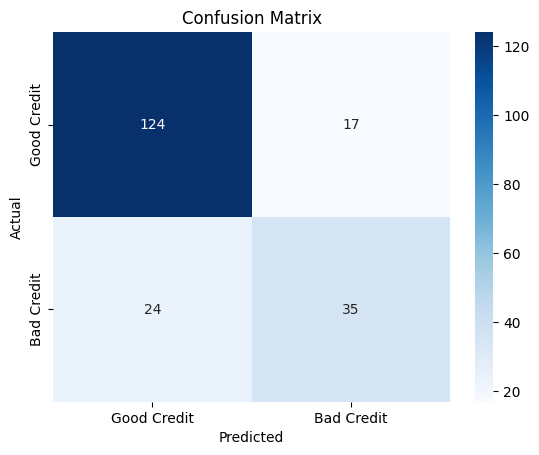

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good Credit', 'Bad Credit'], yticklabels=['Good Credit', 'Bad Credit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

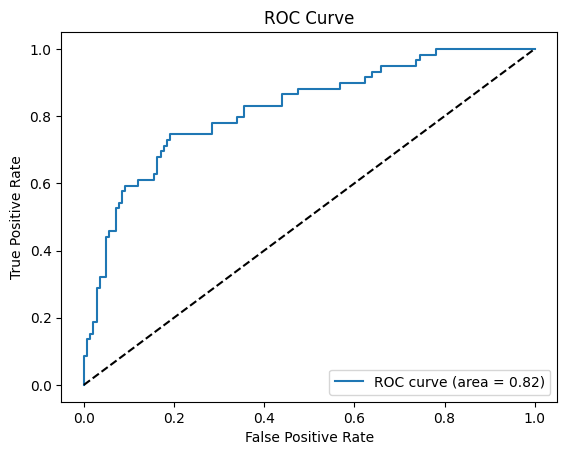

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()